<a href="https://colab.research.google.com/github/Sabipikin/Jobs/blob/main/Modelling_of_Activities_of_Daily_Living_Using_Local_Interpretable_Model_Agnostic_Explanation_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# **Import Dataset**

In [ ]:
data_dir = "/content/drive/MyDrive/Kachi/Activities"
classes = os.listdir(data_dir)
data, labels = [], []

for idx, activity in enumerate(classes):
    activity_path = os.path.join(data_dir, activity)
    for img_name in os.listdir(activity_path):
        img_path = os.path.join(activity_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Resize for consistent input shape
        img = cv2.resize(img, (128, 128))
        # image format
        data.append(img.astype(np.float32)/255.0)
        labels.append(idx)

data = np.array(data) / 255.0
data = np.expand_dims(data, axis=-1)
labels = np.array(labels)

# **Eploratory Data Analysis**

In [ ]:
#Explore Dataset Characteristics
num_classes = len(classes)
print(f'Number of classes: {num_classes}')
print(f'Class labels: {classes}')

Number of classes: 6
Class labels: ['Making Tea', 'Entering And Leaving Kitchen', 'Hot Water Only', 'Sitting Down', 'Walking around Kitechen', 'Boiling water']


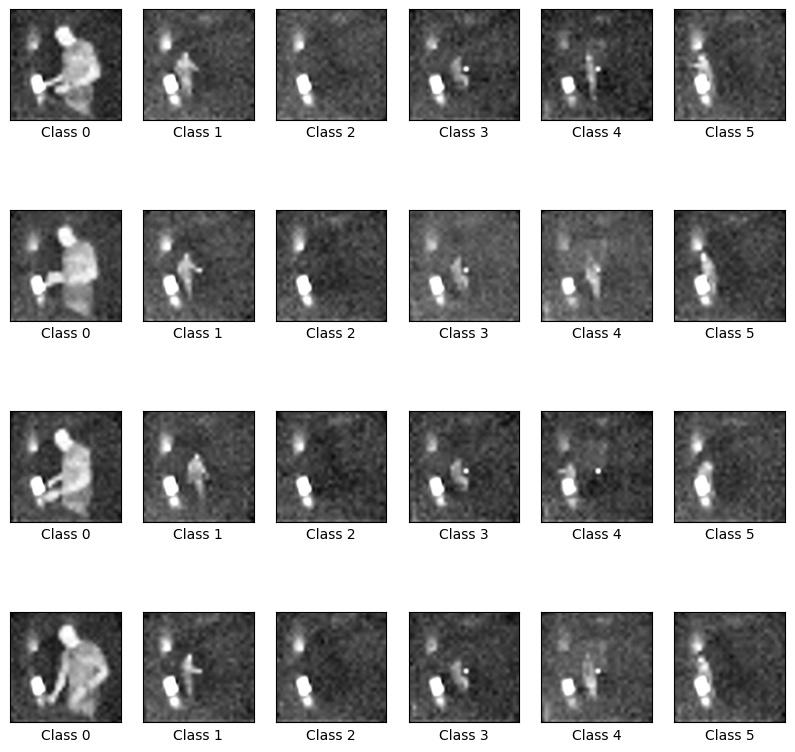

In [ ]:
num_classes = len(classes)

plt.figure(figsize=(10, 10))
for i in range(num_classes):
    class_images = [data[j] for j in range(len(data)) if labels[j] == i]
    for j in range(4):  # Display 4 images per class
        plt.subplot(4, num_classes, i + 1 + j * num_classes)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(class_images[j].squeeze(), cmap='gray')  # Display grayscale images
        plt.xlabel(f'Class {i}')
plt.show()

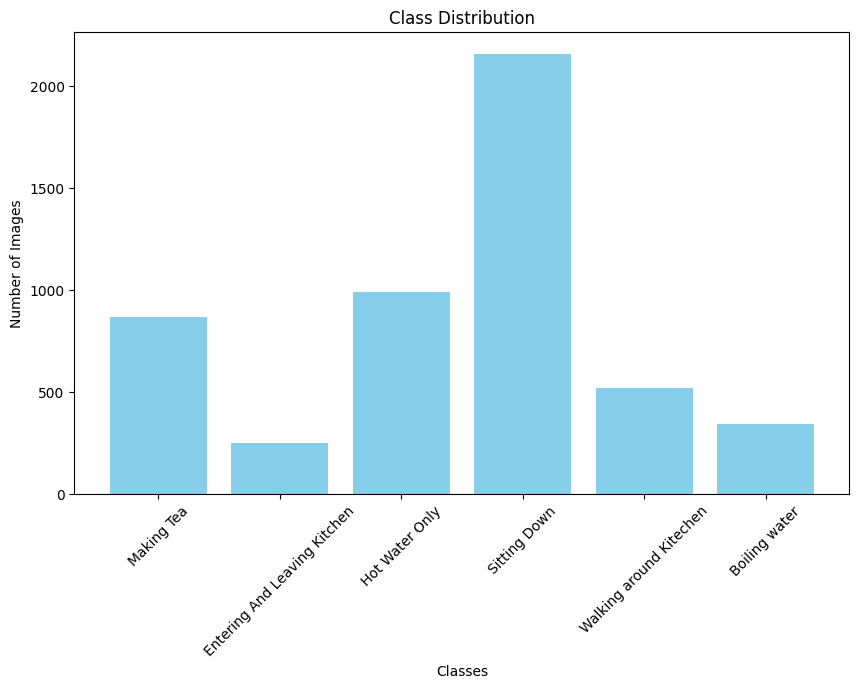

In [ ]:
# Check Class Distribution
class_counts = [np.sum(labels == i) for i in range(num_classes)]

plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [ ]:
# Split Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# **Build CNN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense

# Build a basic CNN with SeparableConv2D for grayscale images
model = Sequential()
model.add(SeparableConv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Assuming 'num_classes' is defined

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
116/116 [==============================] - 53s 451ms/step - loss: 1.5665 - accuracy: 0.4252 - val_loss: 1.5667 - val_accuracy: 0.4220
Epoch 2/10
116/116 [==============================] - 47s 406ms/step - loss: 1.5425 - accuracy: 0.4252 - val_loss: 1.5798 - val_accuracy: 0.4220
Epoch 3/10
116/116 [==============================] - 49s 426ms/step - loss: 1.5370 - accuracy: 0.4252 - val_loss: 1.5489 - val_accuracy: 0.4220
Epoch 4/10
116/116 [==============================] - 46s 393ms/step - loss: 1.4883 - accuracy: 0.4255 - val_loss: 1.4677 - val_accuracy: 0.4220
Epoch 5/10
116/116 [==============================] - 52s 449ms/step - loss: 1.3426 - accuracy: 0.4867 - val_loss: 1.2140 - val_accuracy: 0.5512
Epoch 6/10
116/116 [==============================] - 48s 418ms/step - loss: 1.0285 - accuracy: 0.6434 - val_loss: 0.8851 - val_accuracy: 0.7366
Epoch 7/10
116/116 [==============================] - 52s 446ms/step - loss: 0.7702 - accuracy: 0.7583 - val_loss: 0.7120 - val_ac

# **Performance Evaluation Of CNN**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'X_test' contains your test data and 'y_test' contains the true labels

# Define class labels
class_labels = ['Making Tea', 'Entering And Leaving Kitchen', 'Hot Water Only', 'Sitting Down', 'Walking around Kitchen', 'Boiling Water']

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=-1)

# Calculate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_labels)

# Calculate confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=range(len(class_labels)))

from tabulate import tabulate
# Print the report and confusion matrix in tables
print(report)
print("Confusion Matrix:")
conf_matrix_table = tabulate(conf_matrix, headers=class_labels, showindex=class_labels, tablefmt='grid')
print(conf_matrix_table)

33/33 [==============================] - 6s 170ms/step
                              precision    recall  f1-score   support

                  Making Tea       0.00      0.00      0.00       198
Entering And Leaving Kitchen       0.00      0.00      0.00        45
              Hot Water Only       0.00      0.00      0.00       200
                Sitting Down       0.41      1.00      0.58       417
      Walking around Kitchen       0.00      0.00      0.00        90
               Boiling Water       0.00      0.00      0.00        75

                    accuracy                           0.41      1025
                   macro avg       0.07      0.17      0.10      1025
                weighted avg       0.17      0.41      0.24      1025

Confusion Matrix:
+------------------------------+--------------+--------------------------------+------------------+----------------+--------------------------+-----------------+
|                              |   Making Tea |   Entering And

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Predict Abnormal Behaviour**

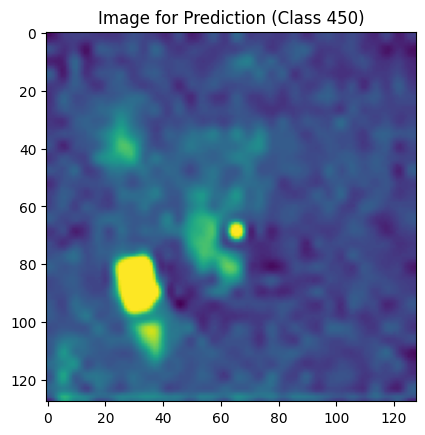

1/1 [==============================] - 0s 24ms/step
Predicted class for index 450: Sitting Down


In [ ]:
# Load x_test data
x_test_path = '/content/drive/MyDrive/Kachi/x_test.npy'
x_test = np.load(x_test_path)

index = 450  # Change this to any valid index
image = x_test[index]

# Display the image
plt.imshow(image)
plt.title(f"Image for Prediction (Class {index})")
plt.show()

# Make prediction
prediction = model.predict(np.expand_dims(image, axis=0))

class_labels = ['Making Tea', 'Entering And Leaving Kitchen', 'Hot Water Only', 'Sitting Down', 'Walking around Kitchen', 'Boiling Water']
predicted_class = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class]
print(f"Predicted class for index {index}: {predicted_class_label}")

# **APPLY Local Interpretable Model-agnostic Explanations (LIME)**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=78073a844ae4de155c52d4f0332088f0e2ebb79255fb3ef96f2eec189b4bb3f6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a basic CNN for RGB images
simplified_model = Sequential()
simplified_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))  # Change input shape to (128, 128, 3)
simplified_model.add(MaxPooling2D((2,2)))
simplified_model.add(Flatten())
simplified_model.add(Dense(64, activation='relu'))
simplified_model.add(Dense(num_classes, activation='softmax'))  # Assuming 'num_classes' is defined

simplified_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


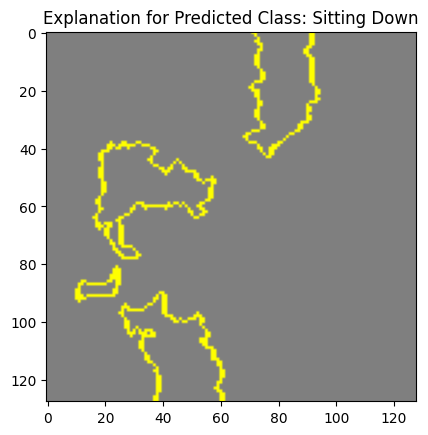

Explanation Summary:
Feature: 48, Weight: -5.6817611527202915e-06
Feature: 50, Weight: 2.234217381821579e-06
Feature: 24, Weight: -2.1037554119789374e-06
Feature: 32, Weight: -1.7592689236483072e-06
Feature: 8, Weight: 1.7239461350940506e-06
Feature: 39, Weight: 1.6445758473858233e-06
Feature: 7, Weight: -1.1822983794849438e-06
Feature: 11, Weight: -1.121518328924215e-06
Feature: 22, Weight: 1.1190447121293053e-06
Feature: 46, Weight: -1.1097866254707009e-06
Feature: 30, Weight: -1.0945960480429045e-06
Feature: 29, Weight: 1.0126813488503984e-06
Feature: 43, Weight: 9.590229919095202e-07
Feature: 27, Weight: 8.954331949468509e-07
Feature: 28, Weight: 6.947612800295327e-07
Feature: 1, Weight: 6.724814763351583e-07
Feature: 33, Weight: 5.918016727267474e-07
Feature: 42, Weight: 5.650381736274683e-07
Feature: 0, Weight: 4.3245329561335405e-07
Feature: 13, Weight: -4.037397273282742e-07
Feature: 47, Weight: 4.036695121253533e-07
Feature: 19, Weight: -4.0272243032803677e-07
Feature: 26, Wei

In [ ]:
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Initialize LimeImageExplainer
explainer = LimeImageExplainer()

# Get the original image
original_image = x_test[index]

# Assuming your model expects input shape (128, 128, 3)
expected_input_shape = (128, 128, 3)

# Check original_image shape
if original_image.shape != expected_input_shape:
    # If shapes don't match, you might need to resize or preprocess the image
    original_image = cv2.resize(original_image, (expected_input_shape[1], expected_input_shape[0]))

# Generate explanation
explanation = explainer.explain_instance(original_image, simplified_model.predict, top_labels=5)

# Visualize explanation
predicted_class = np.argmax(prediction)
temp, mask = explanation.get_image_and_mask(predicted_class, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f'Explanation for Predicted Class: {predicted_class_label}')
plt.show()

# Get the explanation summary
explanation_summary = explanation.local_exp[predicted_class]

# Print explanation summary
print("Explanation Summary:")
for feature, weight in explanation_summary:
    print(f"Feature: {feature}, Weight: {weight}")

Class Label: Making Tea


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


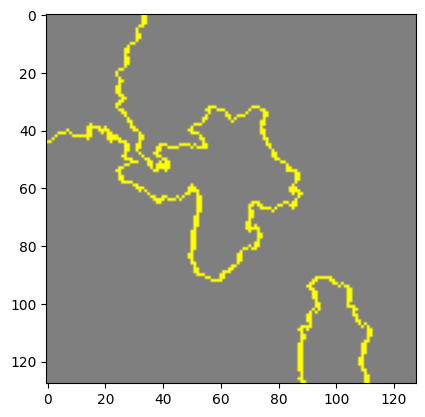

Explanation Summary:
Feature: 23, Weight: -5.668424391309025e-06
Feature: 14, Weight: 3.189521011246752e-06
Feature: 13, Weight: 1.9302581389673742e-06
Feature: 29, Weight: -1.7078952997186367e-06
Feature: 32, Weight: -1.3545701945401567e-06
Feature: 18, Weight: 1.340454423855832e-06
Feature: 39, Weight: -1.1702281116717588e-06
Feature: 5, Weight: -1.1363636583124636e-06
Feature: 4, Weight: 1.1104728565541666e-06
Feature: 42, Weight: 9.873469367863423e-07
Feature: 31, Weight: 9.86373158186883e-07
Feature: 44, Weight: -7.245012637398432e-07
Feature: 36, Weight: 5.992643970530123e-07
Feature: 45, Weight: -5.869449609051393e-07
Feature: 2, Weight: 5.191274386533641e-07
Feature: 7, Weight: -4.5942005585823947e-07
Feature: 3, Weight: 4.4420299781903474e-07
Feature: 1, Weight: 4.37625028921535e-07
Feature: 27, Weight: -4.318021867258508e-07
Feature: 47, Weight: -3.7067053585938105e-07
Feature: 6, Weight: -3.6577088873279607e-07
Feature: 34, Weight: 3.1083302197363005e-07
Feature: 19, Weight:

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


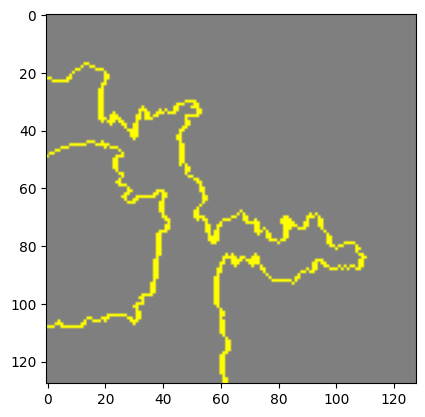

Explanation Summary:
Feature: 5, Weight: 5.339202244552055e-06
Feature: 21, Weight: -4.3516626990510055e-06
Feature: 37, Weight: 3.205682492277613e-06
Feature: 22, Weight: -1.3829738844646652e-06
Feature: 24, Weight: 1.3337517674986605e-06
Feature: 28, Weight: -1.3103721562782293e-06
Feature: 16, Weight: 1.2354287072115409e-06
Feature: 40, Weight: 1.1478059971622901e-06
Feature: 19, Weight: 1.0821791362835003e-06
Feature: 11, Weight: 1.050056659452158e-06
Feature: 6, Weight: -9.77423328685441e-07
Feature: 3, Weight: 7.501309007432158e-07
Feature: 9, Weight: -6.697562053581242e-07
Feature: 14, Weight: 6.388752141123931e-07
Feature: 36, Weight: 5.42461820320002e-07
Feature: 0, Weight: -5.305689852956277e-07
Feature: 13, Weight: -5.287291832222315e-07
Feature: 20, Weight: 4.888018100104572e-07
Feature: 34, Weight: 4.673546370164634e-07
Feature: 12, Weight: -4.6694254728898763e-07
Feature: 32, Weight: 4.4487549474872054e-07
Feature: 39, Weight: -4.424803627263767e-07
Feature: 25, Weight: 4

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


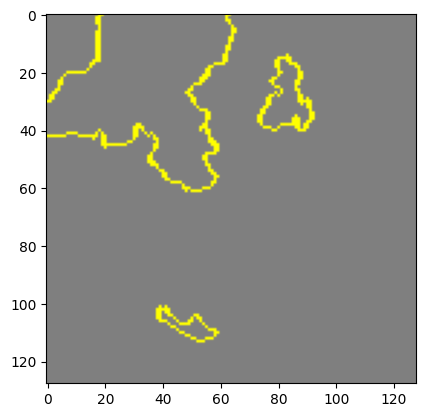

Explanation Summary:
Feature: 49, Weight: -5.801017770518367e-06
Feature: 21, Weight: -3.847157453592766e-06
Feature: 8, Weight: 3.287481779524137e-06
Feature: 6, Weight: 2.097712342164531e-06
Feature: 15, Weight: -1.7769735568124002e-06
Feature: 9, Weight: 1.6475862385786304e-06
Feature: 10, Weight: -1.2524779767318043e-06
Feature: 18, Weight: 1.2034254462611133e-06
Feature: 56, Weight: -9.516024105662265e-07
Feature: 3, Weight: -8.356635619608214e-07
Feature: 24, Weight: -8.341700236699294e-07
Feature: 48, Weight: 7.377432341113413e-07
Feature: 1, Weight: 7.341931120664698e-07
Feature: 38, Weight: 6.625742696132897e-07
Feature: 30, Weight: 6.157260216429047e-07
Feature: 14, Weight: -6.147722551714708e-07
Feature: 57, Weight: -6.104937197409534e-07
Feature: 55, Weight: -5.945454922657163e-07
Feature: 22, Weight: 5.322395591784733e-07
Feature: 34, Weight: -4.7116752888123395e-07
Feature: 11, Weight: -4.3490446611483994e-07
Feature: 52, Weight: -4.3256317705090275e-07
Feature: 19, Weigh

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


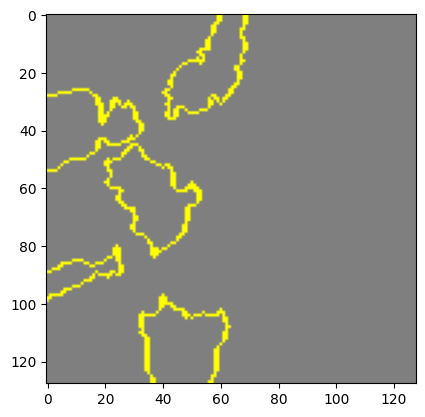

Explanation Summary:
Feature: 16, Weight: 3.867377266032313e-06
Feature: 47, Weight: -3.3770363479418353e-06
Feature: 22, Weight: -2.963884316623198e-06
Feature: 52, Weight: -2.9070369519451314e-06
Feature: 4, Weight: -2.0349666241903957e-06
Feature: 44, Weight: 1.8504814325183942e-06
Feature: 2, Weight: 1.7697012050439555e-06
Feature: 31, Weight: 1.3016013995272183e-06
Feature: 57, Weight: 1.2696713626472375e-06
Feature: 30, Weight: -1.1049592710055997e-06
Feature: 43, Weight: 9.137010790941398e-07
Feature: 51, Weight: 8.788505248499895e-07
Feature: 59, Weight: -8.356972120861167e-07
Feature: 7, Weight: -6.190108998970188e-07
Feature: 1, Weight: -6.182296677512209e-07
Feature: 6, Weight: 6.074150461939524e-07
Feature: 40, Weight: 5.612178490005341e-07
Feature: 42, Weight: -5.494053472455753e-07
Feature: 41, Weight: -4.907884870232471e-07
Feature: 34, Weight: 4.433179054351243e-07
Feature: 0, Weight: -4.0327927586828713e-07
Feature: 5, Weight: -3.885481985656876e-07
Feature: 50, Weight

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


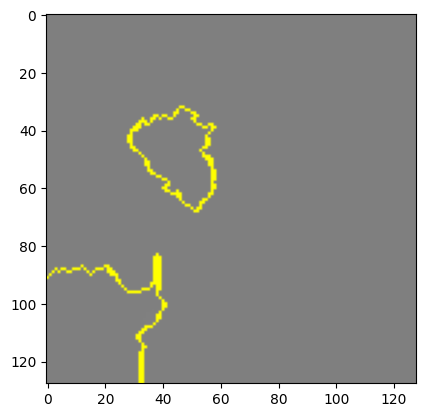

Explanation Summary:
Feature: 69, Weight: 3.761636466729337e-06
Feature: 34, Weight: -3.3054455097839908e-06
Feature: 60, Weight: -2.0106234512836967e-06
Feature: 12, Weight: 1.9967156197644382e-06
Feature: 82, Weight: 1.8633687952239487e-06
Feature: 11, Weight: 1.3796384602390438e-06
Feature: 80, Weight: 1.3599013054778285e-06
Feature: 54, Weight: -1.3587356793286881e-06
Feature: 3, Weight: -1.1308760425802006e-06
Feature: 0, Weight: 1.004460788062021e-06
Feature: 77, Weight: -9.205436554750361e-07
Feature: 42, Weight: 8.526077477817974e-07
Feature: 83, Weight: 7.733153618250993e-07
Feature: 15, Weight: 6.454028527652166e-07
Feature: 63, Weight: -6.354783854603244e-07
Feature: 61, Weight: 6.184479345023223e-07
Feature: 22, Weight: 6.09133367736179e-07
Feature: 76, Weight: -5.808900986078786e-07
Feature: 64, Weight: -5.232178525844292e-07
Feature: 59, Weight: 4.772978332353746e-07
Feature: 35, Weight: 4.429988615471924e-07
Feature: 7, Weight: 4.081840188578392e-07
Feature: 73, Weight: 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


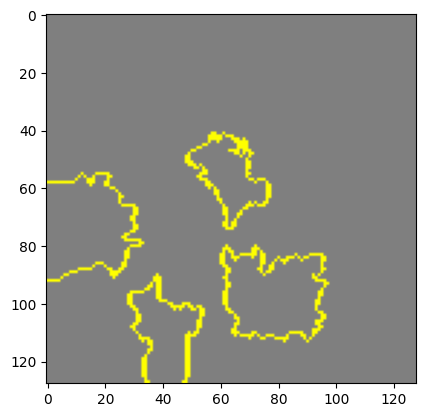

Explanation Summary:
Feature: 46, Weight: -6.982500859747932e-06
Feature: 33, Weight: -3.1995694247568187e-06
Feature: 39, Weight: 2.0510481043213037e-06
Feature: 17, Weight: -2.0207582093817367e-06
Feature: 15, Weight: -1.8586525697062172e-06
Feature: 54, Weight: 1.737225556001655e-06
Feature: 60, Weight: -1.3041418670743463e-06
Feature: 55, Weight: -1.1743399226419698e-06
Feature: 35, Weight: 1.153733660351375e-06
Feature: 51, Weight: -1.1394085630414372e-06
Feature: 49, Weight: -9.106439860469057e-07
Feature: 58, Weight: 8.458944021216884e-07
Feature: 28, Weight: 8.436676217804002e-07
Feature: 26, Weight: -7.972069574667273e-07
Feature: 20, Weight: 7.969239280646707e-07
Feature: 8, Weight: -7.282556675752363e-07
Feature: 29, Weight: -6.606865468977523e-07
Feature: 32, Weight: -5.306198709030616e-07
Feature: 40, Weight: 4.877719375809714e-07
Feature: 36, Weight: -4.850032601830651e-07
Feature: 24, Weight: 4.441880249020093e-07
Feature: 27, Weight: -4.211493268257016e-07
Feature: 21, 

In [ ]:
# Loop through each class label
for i, label in enumerate(class_labels):
    print(f"Class Label: {label}")
    print("="*30)

    # Get an example image for the class (you may need to adjust this logic)
    class_images = [x_test[j] for j in range(len(x_test)) if y_test[j] == i]

    if class_images:
        image = class_images[0]  # Get the first example for demonstration
    else:
        print(f"No example images found for class {label}")
        continue

    # Assuming 'image' is the grayscale image you want to explain
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Assuming your model expects input shape (128, 128, 3)
    expected_input_shape = (128, 128, 3)

    # Check original_image shape
    if image_rgb.shape != expected_input_shape:
        # If shapes don't match, you might need to resize or preprocess the image
        image_rgb = cv2.resize(image_rgb, (expected_input_shape[1], expected_input_shape[0]))

    # Generate explanation
    explanation_other = explainer.explain_instance(image_rgb, simplified_model.predict, top_labels=5)

    # Visualize explanation
    predicted_class1 = np.argmax(simplified_model.predict(np.expand_dims(image_rgb, axis=0)))
    temp, mask = explanation_other.get_image_and_mask(predicted_class1, positive_only=True, num_features=5, hide_rest=True)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

    # Get the explanation summary
    explanation_summary1 = explanation_other.local_exp[predicted_class1]

    # Print explanation summary
    print("Explanation Summary:")
    for feature, weight in explanation_summary1:
        print(f"Feature: {feature}, Weight: {weight}")

    print("="*30)